In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid", {
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True
})
sns.set(font_scale=1)
#sns.set_style("darkgrid")
sns.set_context("paper")
import sys
import os
from scipy.optimize import newton, minimize, fsolve
from scipy.interpolate import InterpolatedUnivariateSpline, krogh_interpolate, PchipInterpolator, interp1d
import numpy as np
import copy
import re
from pathlib import Path

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import matplotlib.colors as mcolors
palette = list(mcolors.TABLEAU_COLORS.keys())
palette.extend(['salmon', 'teal','yellowgreen'])
%matplotlib inline

In [2]:
fnam = 'CC_vs_PCV_data.tab'
df = pd.read_csv(fnam, sep='\t')

In [3]:
df

,Cell line,PCV (uL),% of Theoretical PCV,Cell type,Theoretical PCV (uL),Replicate,Speed (g),Time (min),Centrifugation step
0,143B,3.7,175.355450,Adherent,2.11,1,2000,1,1
1,143B,3.8,180.094787,Adherent,2.11,2,2000,1,1
2,143B,3.5,165.876777,Adherent,2.11,3,2000,1,1
3,143B,3.7,175.355450,Adherent,2.11,4,2000,1,1
4,143B,3.7,175.355450,Adherent,2.11,5,2000,1,1
...,...,...,...,...,...,...,...,...,...
145,JURKAT,2.0,93.896714,Suspension,2.13,2,17000,5,5
146,JURKAT,2.0,93.896714,Suspension,2.13,3,17000,5,5
147,JURKAT,1.8,84.507042,Suspension,2.13,4,17000,5,5
148,JURKAT,1.8,84.507042,Suspension,2.13,5,17000,5,5


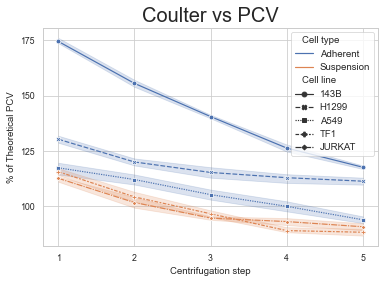

In [4]:
sns.set_style("whitegrid")

plot_name = 'plot_CCvsPCV.pdf'
pdf_plot = matplotlib.backends.backend_pdf.PdfPages(plot_name)

#fig = plt.figure(figsize=(14, 8))
fig = plt.figure()
sns_fig = sns.lineplot(x='Centrifugation step', y='% of Theoretical PCV', style='Cell line', hue='Cell type', 
                       markers=True, ci=50, data=df)
#, err_style='bars'
sns_fig.set(yticks=[100, 125, 150, 175], xticks=[1, 2, 3, 4, 5])

plt.title('Coulter vs PCV', size=20)
#plt.ylabel('Doublings per day')
#plt.xlabel('{} concentration'.format(gradient_agent))

pdf_plot.savefig(fig, bbox_inches='tight')
plt.show()
pdf_plot.close()

<Figure size 432x288 with 0 Axes>

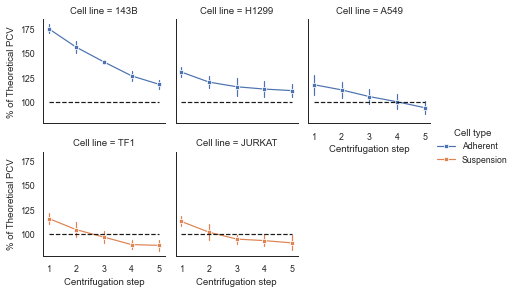

In [6]:
sns.set_style("white")

plot_name = 'plot_CCvsPCV_2.pdf'
pdf_plot = matplotlib.backends.backend_pdf.PdfPages(plot_name)

fig = plt.figure()

sns_fig = sns.FacetGrid(df, col='Cell line', hue='Cell type', height=2, col_wrap=3, hue_kws={'marker': ['s', 's']})
sns_fig.map_dataframe(sns.lineplot, x='Centrifugation step', y='% of Theoretical PCV', markers=True, ci='sd', err_style='bars')

def const_line(*args, **kwargs):
    y = [1, 5]
    x = [100, 100]
    plt.plot(y, x, C='k', linestyle='--')

sns_fig.map(const_line)

sns_fig.set(yticks=[100, 125, 150, 175], xticks=[1, 2, 3, 4, 5])
sns_fig.set_axis_labels('Centrifugation step', '% of Theoretical PCV')

sns_fig.add_legend()

pdf_plot.savefig(sns_fig.fig, bbox_inches='tight')
plt.show()
pdf_plot.close()